In [55]:
import json
from natasha import (
Segmenter,
MorphVocab,
NewsEmbedding,
NewsMorphTagger,
NewsSyntaxParser,
NewsNERTagger,
PER,
NamesExtractor,
Doc
)
from ipymarkup import show_dep_ascii_markup as show_markup

In [56]:
with open('articles.json', encoding='utf-8') as file:
    file_content = file.read()
    data = json.loads(file_content)

print(data)

# В список titles запишем заголовки статей
titles = []
for article in data:
    titles.append(article['title'])

print(titles)
print(f'Количество заголовков: {len(titles)}')

[{'title': 'Гормон удовольствия помог лучше обучаться', 'body': 'Дофамин считают одним из «гормонов счастья» наряду с серотонином, эндорфинами и вазопрессином. Он способствует получению удовольствия от ожидания положительных событий или уже выполненных действий, то есть работает в механизме вознаграждения. Американские и австралийские ученые доказали, что дофамин также играет важную роль в результативности обучения с позитивным подкреплением (с использованием метода «пряника»). Факт, что «гормон удовольствия» помогает быстрее учиться, известен биологам давно. Но как работает этот механизм, до сих пор оставалось неизвестным. Исследователи из Калифорнийского университета в Лос-Анджелесе, Университета Сиднея и Университета штата Нью-Джерси провели исследование, чтобы лучше понять, как дофаминергические нейроны поддерживают обучение с вознаграждением. Дофаминергические нейроны — клетки нервной системы, синтезирующие нейромедиатор дофамин. Биологи провели эксперимент, в котором использовали

In [57]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

In [58]:
for article in data:
    text = article.get('body')
    doc = Doc(text)
    doc.segment(segmenter)
    doc.parse_syntax(syntax_parser)
    doc.tag_morph(morph_tagger)
    
    for sentence in doc.sents: # получаем предложения
        sentence.syntax.print()

        ┌► Дофамин       obj
┌─────┌─└─ считают       
│ ┌─┌─└──► одним         xcomp
│ │ │ ┌──► из            case
│ │ │ │ ┌► «             punct
│ │ └►└─└─ гормонов      nmod
│ │ │ └──► счастья       nmod
│ │ └────► »             punct
│ └──►┌─── наряду        advmod
│     │ ┌► с             case
│ ┌─┌─└►└─ серотонином   obl
│ │ │   ┌► ,             punct
│ │ └──►└─ эндорфинами   conj
│ │     ┌► и             cc
│ └────►└─ вазопрессином conj
└────────► .             punct
          ┌► Он             nsubj
┌─┌─────┌─└─ способствует   
│ │ ┌─┌─└►┌─ получению      iobj
│ │ │ │   └► удовольствия   nmod
│ │ │ │   ┌► от             case
│ │ │ └►┌─└─ ожидания       nmod
│ │ │   │ ┌► положительных  amod
│ │ │   └►└─ событий        nmod
│ │ │ ┌────► или            cc
│ │ │ │   ┌► уже            advmod
│ │ │ │ ┌►└─ выполненных    amod
│ │ └►└─└─── действий       nmod
│ │   ┌────► ,              punct
│ │   │ ┌►┌─ то             mark
│ │   │ │ └► есть           fixed
│ └──►└─└─── работает      

In [59]:
for sentence in doc.sents:
    for token in sentence.tokens: # получаем токены
        print(token)


DocToken(stop=12, text='Палеонтологи', id='1_1', head_id='1_2', rel='nsubj', pos='NOUN', feats=<Anim,Nom,Masc,Plur>)
DocToken(start=13, stop=23, text='обнаружили', id='1_2', head_id='1_0', rel='root', pos='VERB', feats=<Perf,Ind,Plur,Past,Fin,Act>)
DocToken(start=24, stop=26, text='на', id='1_3', head_id='1_4', rel='case', pos='ADP')
DocToken(start=27, stop=33, text='севере', id='1_4', head_id='1_2', rel='obl', pos='NOUN', feats=<Inan,Loc,Masc,Sing>)
DocToken(start=34, stop=42, text='Зимбабве', id='1_5', head_id='1_4', rel='nmod', pos='PROPN', feats=<Inan,Gen,Neut,Sing>)
DocToken(start=43, stop=52, text='фрагменты', id='1_6', head_id='1_2', rel='obj', pos='NOUN', feats=<Inan,Acc,Masc,Plur>)
DocToken(start=53, stop=59, text='задней', id='1_7', head_id='1_8', rel='amod', pos='ADJ', feats=<Gen,Pos,Fem,Sing>)
DocToken(start=60, stop=70, text='конечности', id='1_8', head_id='1_6', rel='nmod', pos='NOUN', feats=<Inan,Gen,Fem,Sing>)
DocToken(start=71, stop=77, text='нового', id='1_9', head_id

In [60]:
# Делим на подлежащие и сказуемые
nsubj = ''
root = ''
pairs = {}
for sentence in doc.sents:
  nsubj = ''
  root = ''
  for token in sentence.tokens:
    token.lemmatize(morph_vocab)

    if token.rel == "nsubj":
      nsubj = token.lemma
    if token.rel == 'root':
      root = token.lemma
    if nsubj and root:
      pairs[nsubj] = root

print(pairs)

{'палеонтолог': 'откопать', 'который': 'происходить', 'завроподоморф': 'обнаружить', 'находка': 'подчеркивать', 'она': 'стать', 'останки': 'находить', 'суперконтинент': 'существовать', 'хищник': 'существовать', 'кость': 'оказаться', 'причина': 'заключаться', 'меньше': 'заключаться', 'группа': 'сообщить', 'что': 'мочь', 'вид': 'оказаться', 'мальчик': 'означать', 'часть': 'потрескаться', 'материал': 'потрескаться', 'ученый': 'определить', 'вес': 'определить', 'это': 'отличаться', 'исследователь': 'отнести', 'анализ': 'позволить', 'открытие': 'подчеркивать', 'раскопка': 'осложняться', 'динозавр': 'похожий', 'данные': 'недостаточно'}


In [61]:
all_pairs = []
for article in data:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    nsubj = ''
    root = ''
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)

      if token.rel == "nsubj":
        nsubj = token.lemma
      if token.rel == 'root':
        root = token.lemma
      if nsubj and root:
        all_pairs.append((nsubj, root))

from collections import Counter


pairs_count = Counter(all_pairs)
pairs_count

Counter({('%', 'утверждаться'): 265,
         ('https', 'утверждаться'): 114,
         ('подробность', 'узнайте'): 106,
         ('она', 'мало'): 96,
         ('ольга', 'добиться'): 77,
         ('они', 'формировать'): 77,
         ('место', 'мочь'): 77,
         ('ученый', 'разработать'): 75,
         ('данные', 'недостаточно'): 71,
         ('вирус', 'высказать'): 70,
         ('политехник', 'готовить'): 67,
         ('координата', 'мочь'): 65,
         ('крыса', 'изучить'): 63,
         ('широта', 'указываться'): 57,
         ('доктор', 'продемонстрировать'): 52,
         ('гормон', 'опубликовать'): 50,
         ('политех', 'разработать'): 47,
         ('я', 'повторить'): 47,
         ('технолог', 'должный'): 46,
         ('лед', 'нет'): 46,
         ('заправка', 'становиться'): 45,
         ('структура', 'появиться'): 45,
         ('\\', 'результат'): 43,
         ('мы', 'добиться'): 41,
         ('подробность', 'аппарат'): 41,
         ('вы', 'писать'): 38,
         ('материя', 'п

In [62]:
pairs_count.most_common(10)

[(('%', 'утверждаться'), 265),
 (('https', 'утверждаться'), 114),
 (('подробность', 'узнайте'), 106),
 (('она', 'мало'), 96),
 (('ольга', 'добиться'), 77),
 (('они', 'формировать'), 77),
 (('место', 'мочь'), 77),
 (('ученый', 'разработать'), 75),
 (('данные', 'недостаточно'), 71),
 (('вирус', 'высказать'), 70)]

In [63]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Glazis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
filtered = []
punct = ['\'', '#', '[', '{', ']', '(', ')', ',', '.', '?', '!', '«', '»', '—', '"', ':', ';', '-', '–','b','n','d','r','/','%', '\\', '1', '2', '3', '4', '5', '6', '7', '9', '0']
for article in data:
  doc = Doc(str(article))
  doc.segment(segmenter)
  doc.parse_syntax(syntax_parser)
  doc.tag_morph(morph_tagger)
  for sentence in doc.sents:
    for token in sentence.tokens:
      token.lemmatize(morph_vocab)
      if token.lemma not in stop_words and token.lemma not in punct:
        filtered.append(token.lemma)

words_count = Counter(filtered)
words_count.most_common(50)

[('который', 106),
 ('это', 104),
 ('год', 82),
 ('мочь', 65),
 ('работа', 59),
 ('топливо', 58),
 ('ученый', 57),
 ('звезда', 54),
 ('новый', 52),
 ('весь', 47),
 ('человек', 45),
 ('время', 45),
 ('орбита', 45),
 ('луна', 40),
 ('например', 38),
 ('вода', 38),
 ('галактика', 36),
 ('исследователь', 35),
 ('система', 34),
 ('почва', 33),
 ('спутник', 30),
 ('растение', 30),
 ('удобрение', 30),
 ('исследование', 29),
 ('свой', 29),
 ('двигатель', 29),
 ('бак', 29),
 ('база', 29),
 ('материя', 28),
 ('нужный', 28),
 ('аппарат', 28),
 ('первый', 27),
 ('земля', 27),
 ('использовать', 26),
 ('автор', 26),
 ('вещество', 26),
 ('космический', 26),
 ('тонна', 26),
 ('часть', 26),
 ('помощь', 25),
 ('объект', 25),
 ('масса', 25),
 ('также', 24),
 ('больший', 24),
 ('лунный', 24),
 ('черный', 23),
 ('миллион', 23),
 ('болезнь', 23),
 ('энергия', 22),
 ('дыра', 22)]

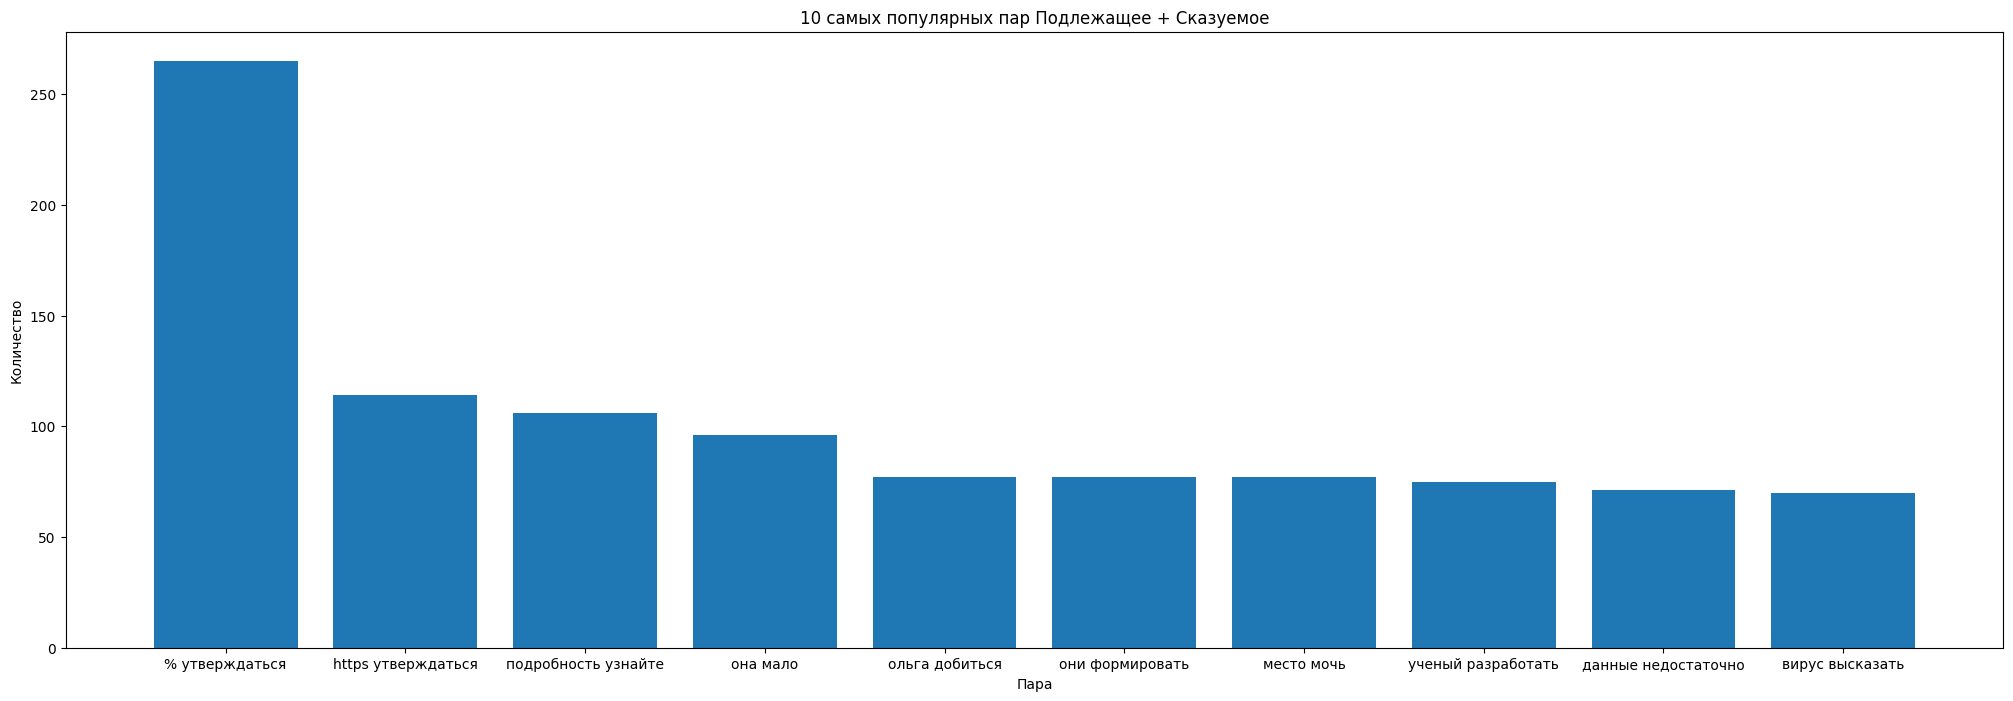

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
data = DataFrame()
pair = [(i[0][0] + ' ' + i[0][1]) for i in pairs_count.most_common(10)]
count = [i[1] for i in pairs_count.most_common(10)]

data["Pair"] = pair
data["Count"] = count
fig, ax = plt.subplots(figsize=(25, 8))

plt.bar(data["Pair"], data["Count"])
plt.title("10 самых популярных пар Подлежащее + Сказуемое")
plt.ylabel("Количество")
plt.xlabel("Пара")
plt.show()

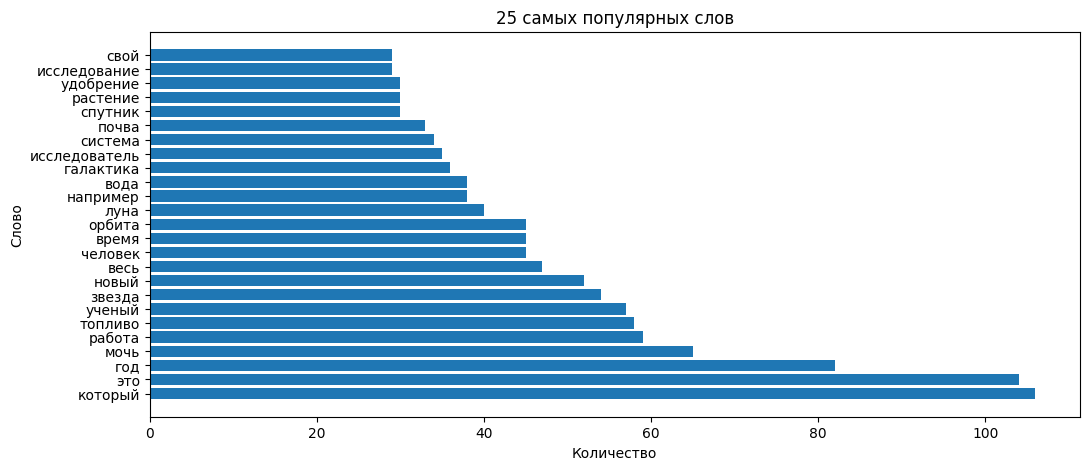

In [66]:

data = DataFrame()
word = [i[0] for i in words_count.most_common(25)]
count = [i[1] for i in words_count.most_common(25)]

data["Word"] = word
data["Count"] = count
fig, ax = plt.subplots(figsize=(12, 5))

plt.barh(data["Word"], data["Count"])
plt.title("25 самых популярных слов")
plt.ylabel("Слово")
plt.xlabel("Количество")
plt.show()